In [1]:
import numpy as numpy
import pandas as pd
import matplotlib as mpl
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, cross_val_score
import joblib

In [3]:
combined_train = pd.read_csv("combined_train.csv")
combined_test = pd.read_csv("combined_test.csv")
train_metadata = pd.read_csv("train/train_metadata.csv")
test_metadata = pd.read_csv("test/test_metadata.csv")

In [4]:
class_ids = train_metadata["ClassId"]
test_ids = test_metadata['id']
combined_train = combined_train.drop("image_path", axis = 1)
combined_test = combined_test.drop("image_path", axis=1)

In [5]:
skf = StratifiedKFold()
scores = []
for train, validation in skf.split(combined_train, class_ids):
    model = RandomForestClassifier(n_estimators=1000)
    model.fit(combined_train.iloc[train], class_ids[train])
    scores.append(model.score(combined_train.iloc[validation], class_ids[validation]))
print(scores)
print(sum(scores)/len(scores))

[0.8187613843351548, 0.7941712204007286, 0.8187613843351548, 0.7976298997265269, 0.8149498632634458]
0.8088547504122021


In [29]:
def printSigns(accuracies, top_n, reverse=False):
    if reverse == True:
        accuracies = list(reversed(accuracies))
    for i in range(top_n):
        classID = accuracies[i][1]
        mpl.pyplot.subplot(2,top_n//2, i + 1)
        img = mpl.image.imread(f'Sign Images/{classID}.png')
        mpl.pyplot.imshow(img)
    mpl.pyplot.show()

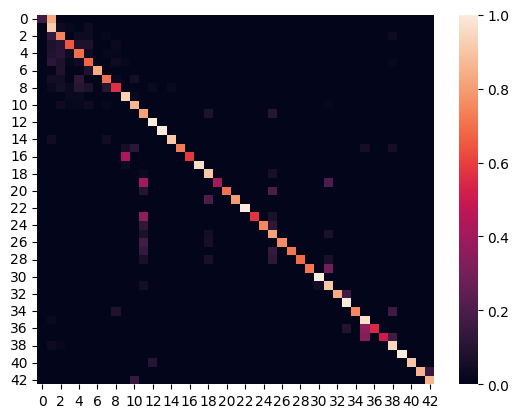

In [38]:
cm = confusion_matrix(class_ids[validation], model.predict(combined_train.iloc[validation]), normalize='true')
sns.heatmap(cm)
class_accuracies = sorted((cm[i][i], i) for i in range(43))

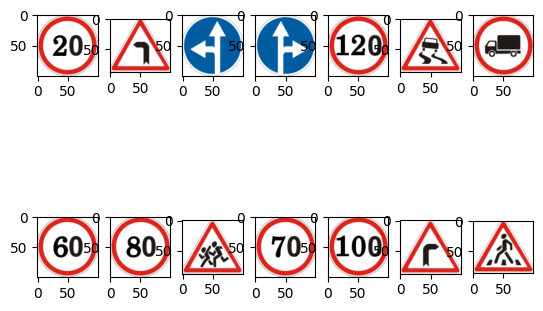

In [45]:
printSigns(class_accuracies, 14)

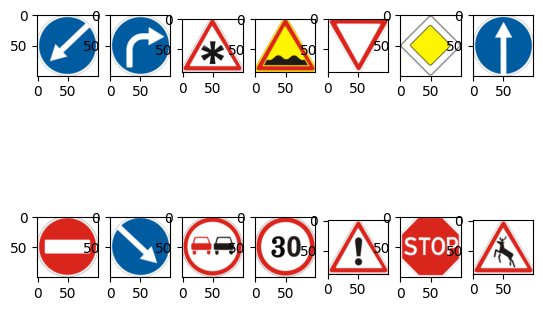

In [46]:
printSigns(class_accuracies, 14, True)

In [ ]:
output = pd.DataFrame()
output["id"] = test_ids
output["ClassId"] = model.predict(combined_test)
output.to_csv("randomforest_initial_outcome.csv", index=False)